In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [79]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')  

In [80]:
calories.head(2)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0


In [81]:
exercise.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3


In [82]:
# Assuming 'User_ID' is the common column to merge on
df = pd.merge(calories, exercise, left_on='User_ID', right_on='User_ID')
df.head(2)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3


<Axes: xlabel='count', ylabel='Gender'>

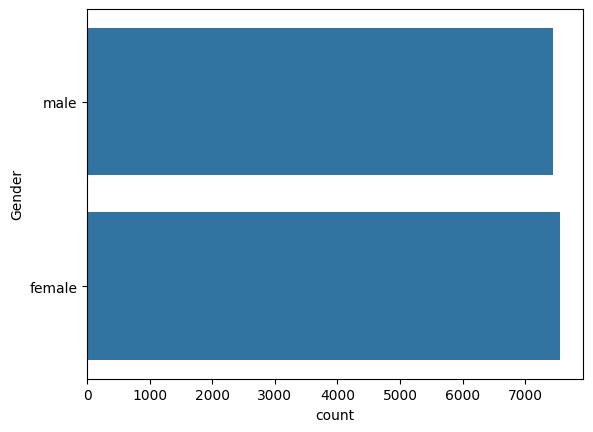

In [83]:
sns.countplot(df['Gender'])

In [84]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

(array([1498., 1272., 1238., 1043.,  975.,  889.,  847.,  759.,  725.,
         650.,  642.,  622.,  549.,  551.,  538.,  478.,  449.,  467.,
         398.,  410.]),
 array([20.  , 22.95, 25.9 , 28.85, 31.8 , 34.75, 37.7 , 40.65, 43.6 ,
        46.55, 49.5 , 52.45, 55.4 , 58.35, 61.3 , 64.25, 67.2 , 70.15,
        73.1 , 76.05, 79.  ]),
 <BarContainer object of 20 artists>)

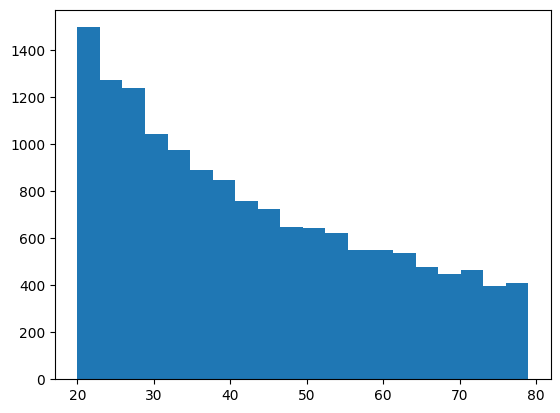

In [85]:
plt.hist(df['Age'], bins=20)

<Axes: xlabel='Age', ylabel='Calories'>

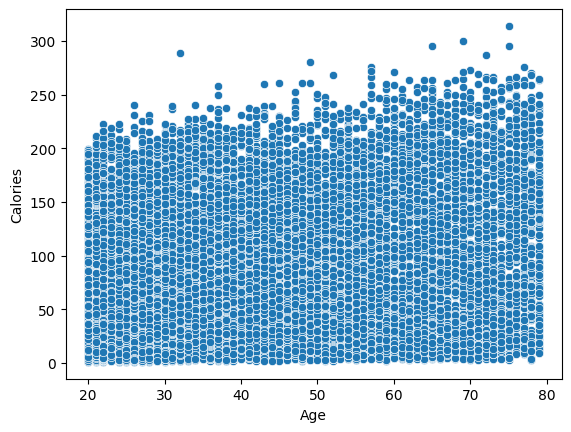

In [86]:
sns.scatterplot(x=df['Age'], y=df['Calories'])

<Axes: xlabel='Duration', ylabel='Calories'>

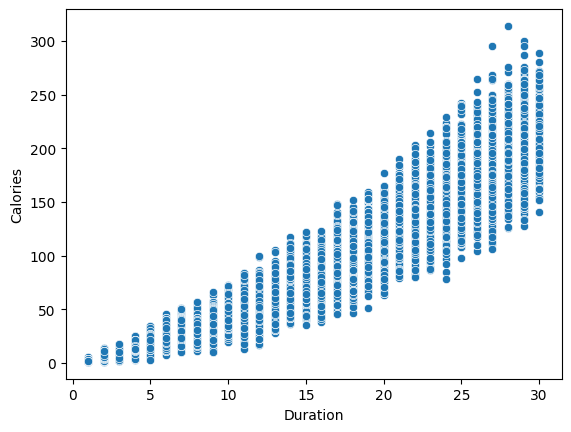

In [87]:
sns.scatterplot(x=df['Duration'], y=df['Calories'])

<Axes: xlabel='Age', ylabel='Height'>

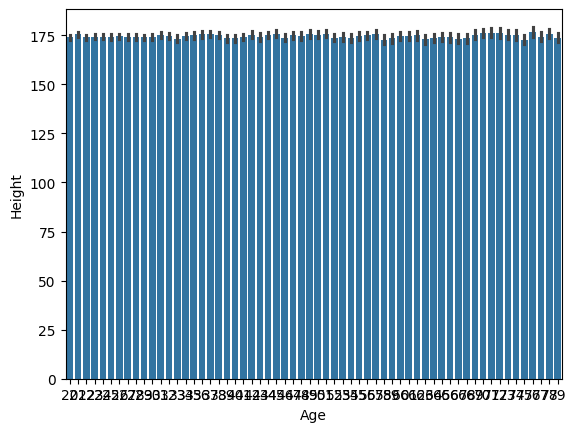

In [88]:
sns.barplot(x='Age', y='Height', data=df)

<Axes: xlabel='Age', ylabel='Gender'>

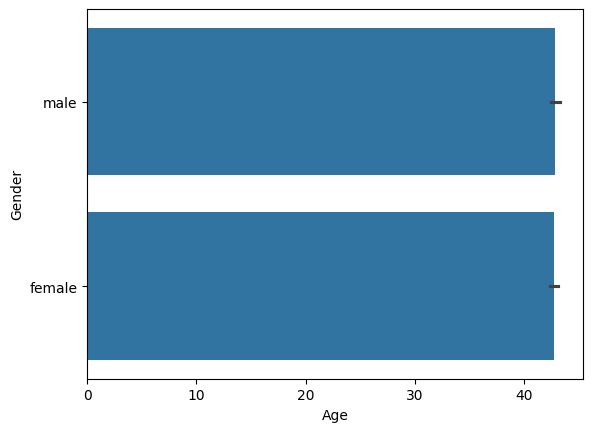

In [89]:
sns.barplot(x='Age', y='Gender', data=df)

<Axes: xlabel='Gender', ylabel='Age'>

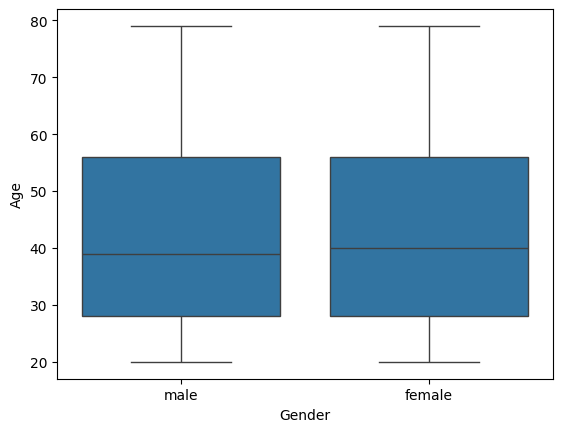

In [90]:
sns.boxplot(x='Gender', y='Age', data=df)

In [91]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


<Axes: xlabel='Age', ylabel='Calories'>

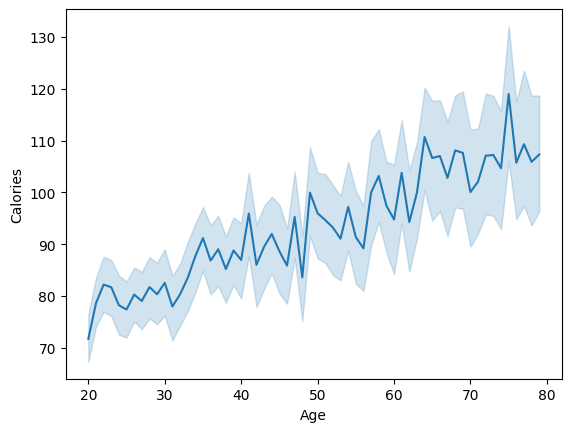

In [92]:
sns.lineplot(x='Age', y='Calories', data=df)

In [93]:
df['Gender'] = df['Gender'].map({ 'male': 1, 'female': 0 })
df.head(3)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,1,69,179.0,79.0,5.0,88.0,38.7


In [94]:
x = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

In [95]:
x.shape

(15000, 7)

In [96]:
y.shape

(15000,)

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [98]:
x_train.shape   

(12000, 7)

In [99]:
#train the model


In [100]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [101]:
models={
'lr': LinearRegression(),
'ls': Lasso(),
'rd': Ridge(),
'dtr': DecisionTreeRegressor(),
'rfr': RandomForestRegressor()
}

In [102]:
for name, mod in models.items():
    mod.fit(x_train, y_train)
    y_pred = mod.predict(x_test)
    print(f'{name} MSE: {mean_squared_error(y_test, y_pred)}, Score: {r2_score(y_test, y_pred)}')


lr MSE: 131.995745750817, Score: 0.9672937151257295
ls MSE: 143.82689461175053, Score: 0.9643621590908397
rd MSE: 131.9962590313935, Score: 0.9672935879435945
dtr MSE: 28.037, Score: 0.9930529116389022
rfr MSE: 7.258912066666666, Score: 0.998201365926006


In [103]:
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

In [104]:
import pickle
pickle.dump(rfr, open('rfr.pkl', 'wb'))

In [105]:
x_train.to_csv('x_train.csv', index=False)